In [2]:
from google.colab import files
uploded = files.upload()

Saving bank-full - bank-full.csv to bank-full - bank-full.csv


In [3]:
import pandas as pd
file  =  pd.read_csv('bank-full - bank-full.csv')
file.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
X =  file.iloc[:,:-1]
Y = file.iloc[:,-1]
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [5]:
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
SS = StandardScaler()
LR = LabelEncoder()
selected_columns_ss = ['age','balance','day','duration','campaign','pdays','previous']
selected_columns_lr = ['job','marital','education','default','housing','loan','contact','month','poutcome']
X[selected_columns_ss] = SS.fit_transform(X[selected_columns_ss])
for columns in selected_columns_lr:
  X[columns] = LR.fit_transform(X[columns])

Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

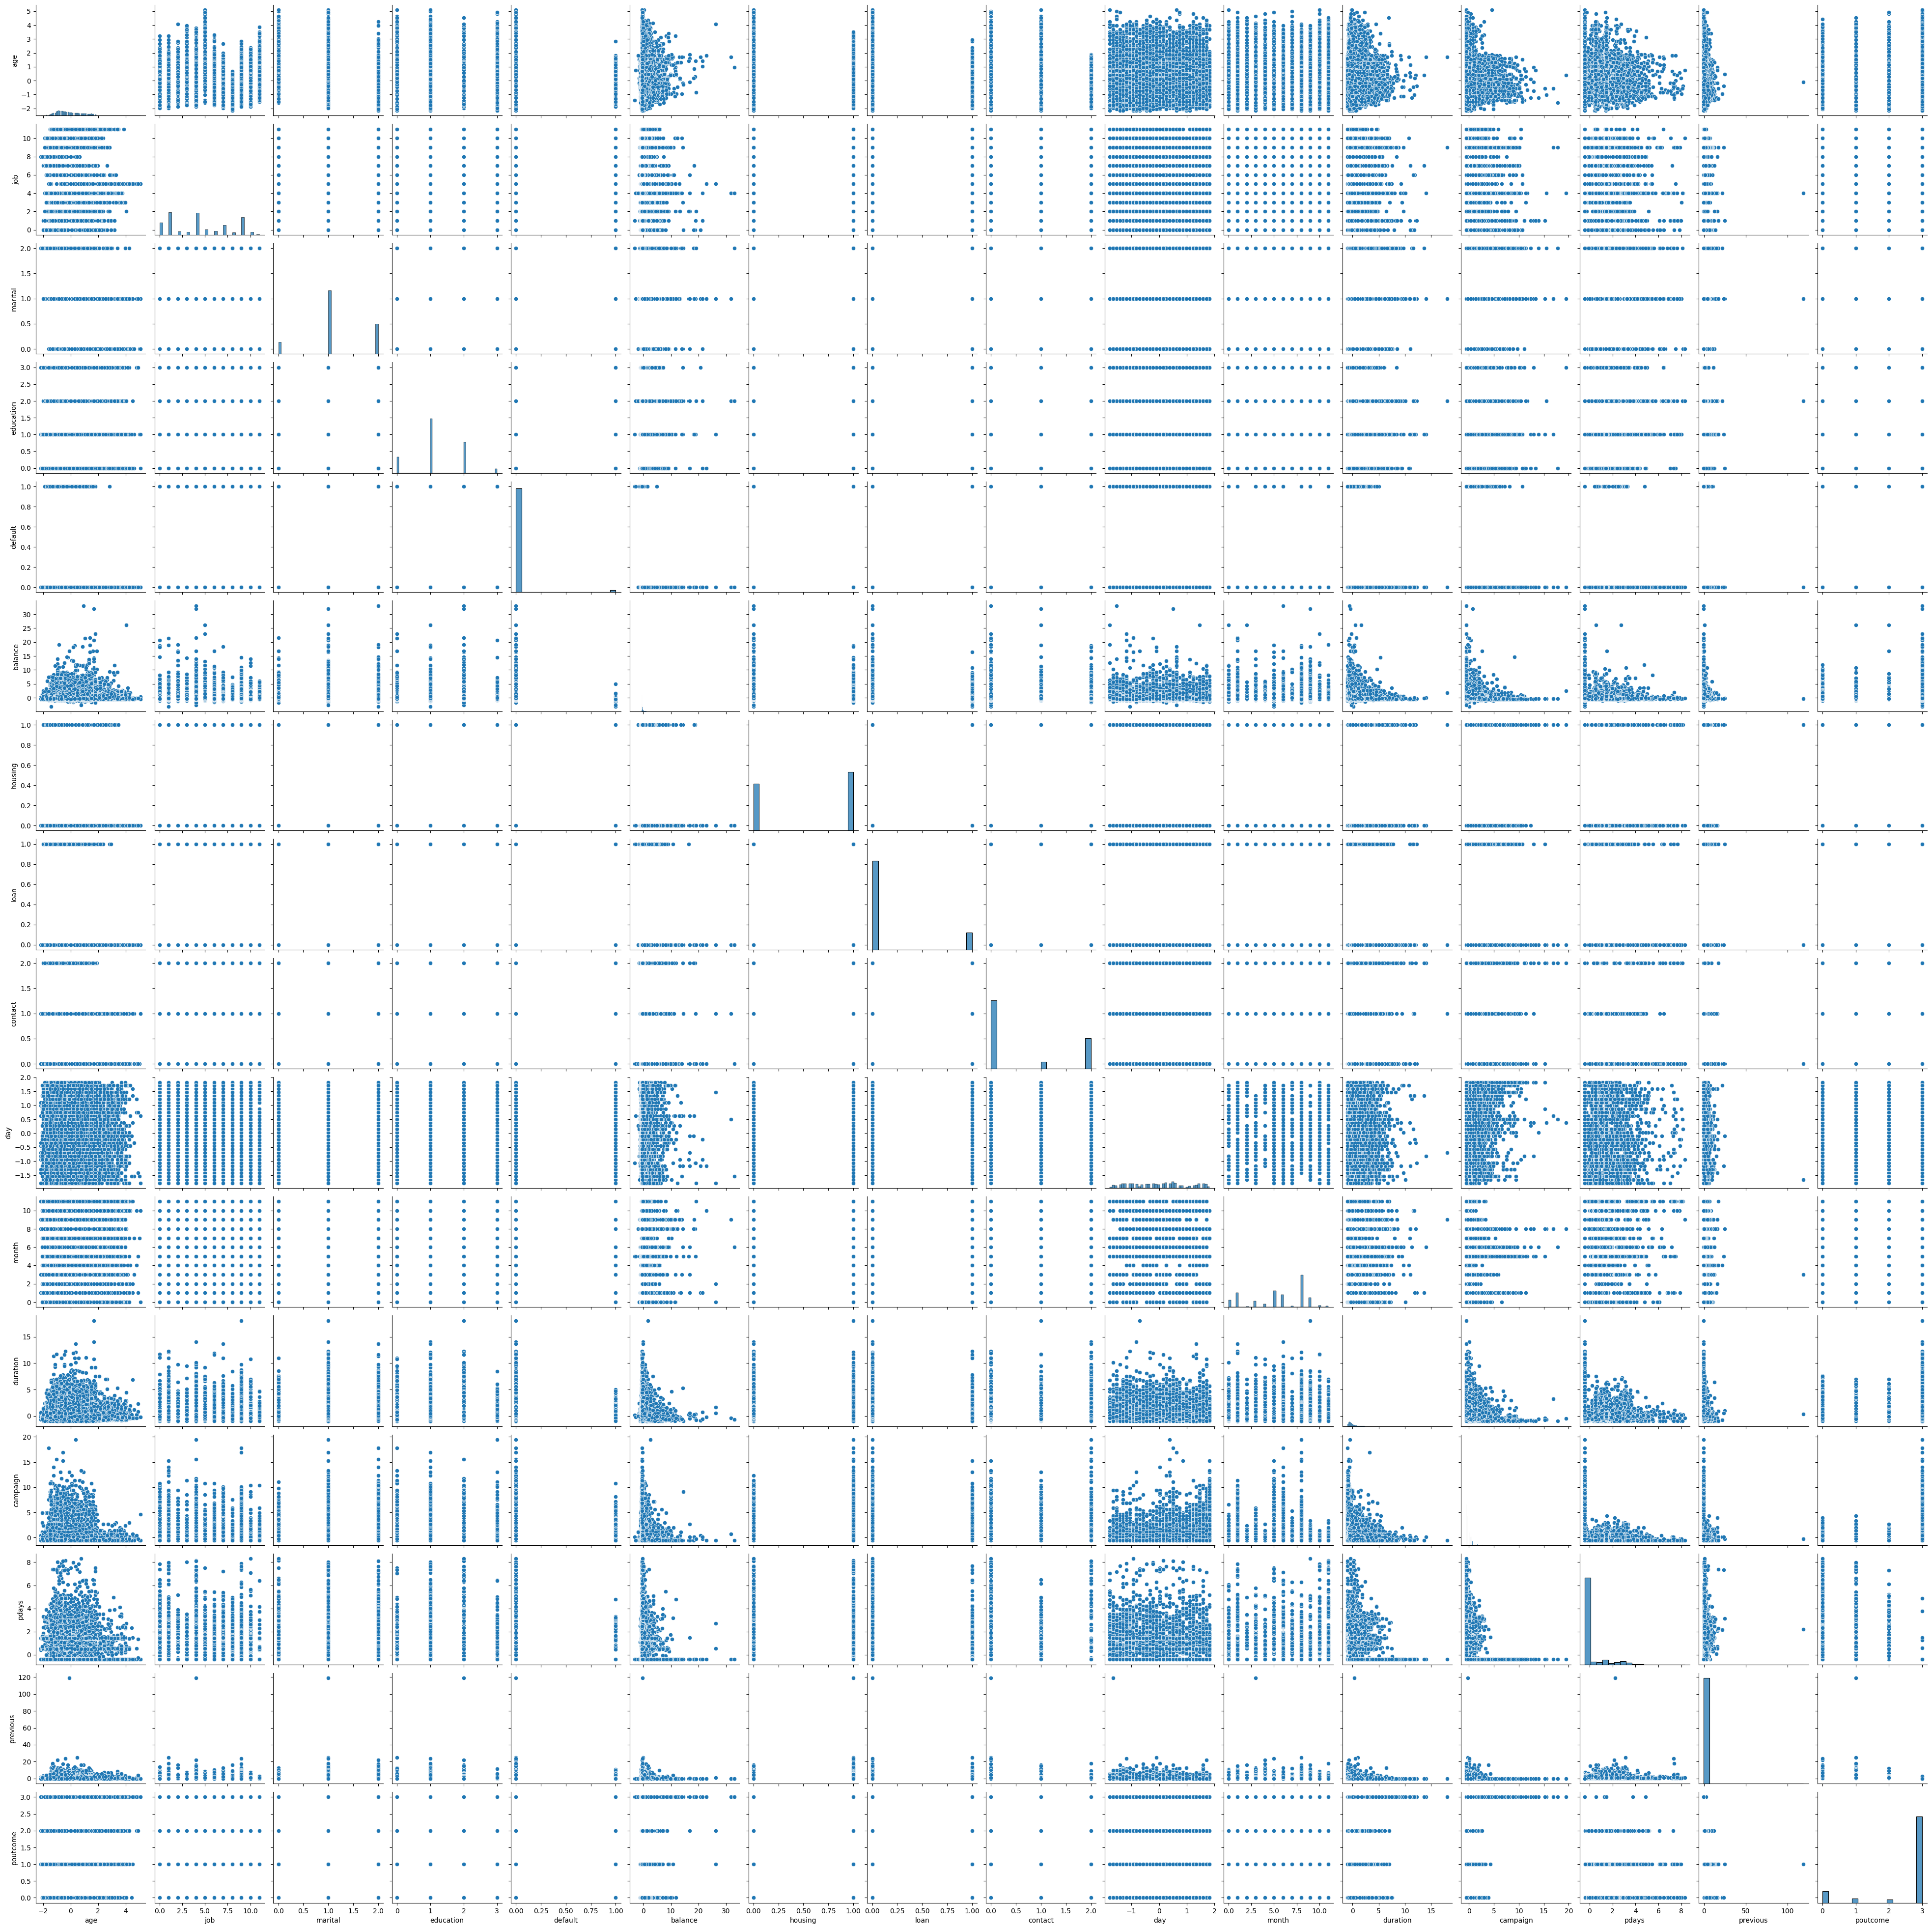

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

<ipython-input-8-af4162943ea8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file.corr()


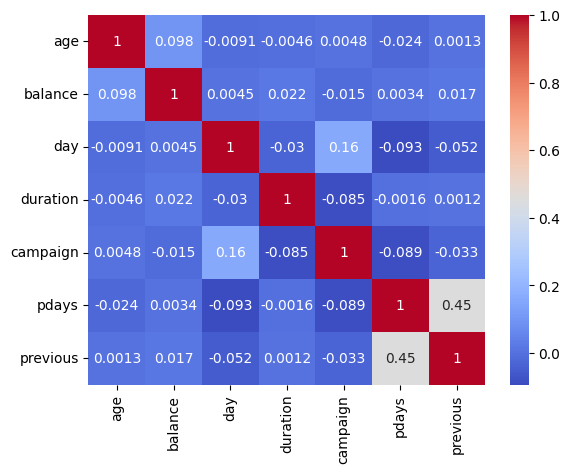

In [8]:
# Calculate correlation matrix
correlation_matrix = file.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

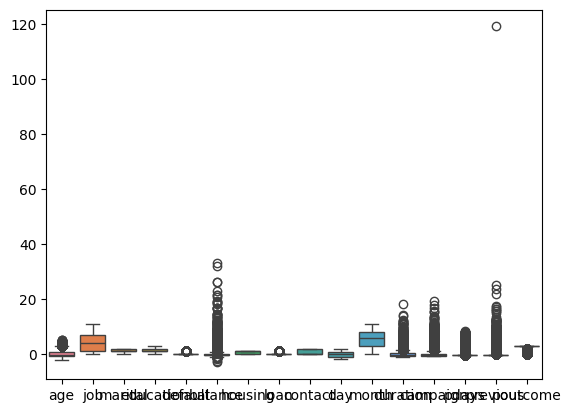

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3


In [9]:
import numpy as np

sns.boxplot(data=X)
plt.show()
X.head()

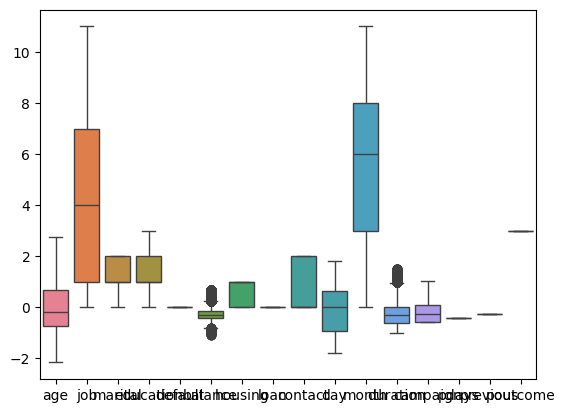

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,4.0,1.0,2.0,0.0,0.256419,1.0,0.0,2.0,-1.298476,8.0,0.011016,-0.569351,-0.411453,-0.25194,3.0
1,0.288529,9.0,2.0,1.0,0.0,-0.437895,1.0,0.0,2.0,-1.298476,8.0,-0.416127,-0.569351,-0.411453,-0.25194,3.0
2,-0.747384,2.0,1.0,1.0,0.0,-0.446762,1.0,0.0,2.0,-1.298476,8.0,-0.707361,-0.569351,-0.411453,-0.25194,3.0
3,0.571051,1.0,1.0,3.0,0.0,0.047205,1.0,0.0,2.0,-1.298476,8.0,-0.645231,-0.569351,-0.411453,-0.25194,3.0
4,-0.747384,11.0,2.0,3.0,0.0,-0.447091,0.0,0.0,2.0,-1.298476,8.0,-0.233620,-0.569351,-0.411453,-0.25194,3.0


In [10]:
import numpy as np
def replace_outliers_with_median(df, columns):
  for column in columns:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - 1.5 * IQR
    upper_limit = df[column].quantile(0.75) + 1.5 * IQR
    df[column] = np.where(
        (df[column] < lower_limit) | (df[column] > upper_limit),
        df[column].median(),
        df[column]
    )
  return df

X = replace_outliers_with_median(X, X.columns)
sns.boxplot(data=X)
plt.show()
X.head()

In [60]:
from sklearn.linear_model import Lasso, Ridge
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

ridge = Ridge(alpha=2.0)
ridge.fit(X, Y_encoded)
print("Ridge coefficients:", ridge.coef_)


lasso = Lasso(alpha=2.0)
lasso.fit(X, Y_encoded)
print("Lasso coefficients:", lasso.coef_)

Ridge coefficients: [ 0.00777551  0.00097327  0.01873041  0.01612259 -0.02015235  0.00657765
 -0.08539403 -0.04466144 -0.03643176 -0.00318179  0.00476082  0.12492899
 -0.00850645  0.02194841  0.01507167]
Lasso coefficients: [ 0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0.]


In [61]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     features  VIF Factor
0         age    1.134764
1         job    2.580216
2     marital    3.993594
3   education    3.291014
4     default    1.028958
5     balance    1.030184
6     housing    2.454885
7        loan    1.189019
8     contact    1.955669
9         day    1.039478
10      month    4.538812
11   duration    1.008938
12   campaign    1.052786
13      pdays    1.377455
14   previous    1.265432


In [41]:
X = X.drop('poutcome', axis=1)


In [62]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y_encoded,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
df = LogisticRegression()
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)


In [67]:
from sklearn.metrics import r2_score, log_loss,accuracy_score


r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 score (train):", r2_train)
print("R2 score (test):", r2_test)


log_loss_train = log_loss(y_train, y_pred_train)
log_loss_test = log_loss(y_test, y_pred_test)

print("Log loss (train):", log_loss_train)
print("Log loss (test):", log_loss_test)


R2 score (train): -0.07126981145576194
R2 score (test): -0.03633729200034197
Log loss (train): 3.9828311025292344
Log loss (test): 3.8716899873152233


In [68]:

training_accuracies = []
test_accuracies = []
logreg = LogisticRegression()
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y_encoded, test_size=0.3, random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train  = logreg.predict(X_train)
    Y_pred_test   = logreg.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  0.89
Cross validation Test Accuracy:  0.89


In [71]:
logreg.fit(X,Y_encoded)

Y_pred = logreg.predict(X)
Y_pred

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_encoded,Y_pred)


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score:", accuracy_score(Y_encoded,Y_pred).round(2))
print("Sensitivity score:", recall_score(Y_encoded,Y_pred).round(2))
print("Precision score:", precision_score(Y_encoded,Y_pred).round(2))
print("F1 score:", f1_score(Y_encoded,Y_pred).round(2))
TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(FP + TN)
print("Specificity score:", TNR.round(2))


Accuracy score: 0.89
Sensitivity score: 0.21
Precision score: 0.59
F1 score: 0.31
Specificity score: 0.9
